<h4>Import the necessary packages</h4>

In [22]:
import requests
import pandas as pd
import urllib
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  56.15 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  36.16 MB/s
vincent-0.4.4- 100% |################################| Time: 0:00:00  39.08 MB/s
folium-0.5.0-p 100% |################################| Time: 0:00:00  49.14 MB/s


<h4>Initialize necessary variables</h4>

In [23]:
VERSION = '20180605' # Foursquare API version
LIMIT=100
mumbai_latitude=19.0760
mumbai_longitude=72.8777

<h4>Read data from file and load into dataframe</h4>

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_7e83f78db8554dc286cf1278a88dfa89 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9Kr7Ne-H87yFq31XpeecLubEXQ0A-oD5Dcz-u44km3Tx',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_7e83f78db8554dc286cf1278a88dfa89.get_object(Bucket='courseracapstonemasterproject-donotdelete-pr-r0hjlfijbgo0j6',Key='Capstone_Dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body,dtype={'Borough':str,'Neighborhood':str,'Population':float,'Average Income':float})
df_data_1.head()
master_data=df_data_1


In [4]:
master_data.head()

,Borough,Neighborhood,Latitude,Longitude,Population,Average Income
0,Western Suburbs,Andheri,19.1136,72.8697,810002.0,23456.0
1,Western Suburbs,Bandra,19.0596,72.8295,337391.0,50000.0
2,Western Suburbs,Borivali,19.2372,72.8441,513077.0,19000.0
3,Western Suburbs,Dahisar,19.2497,72.8594,363827.0,23000.0
4,Western Suburbs,Goregaon,19.1551,72.8679,437849.0,7600.0


<h3>Explore Neighborhoods in Mumbai</h3>
<h4>Let's create a function that will process all the neighborhoods in Mumbai</h4>

In [5]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [6]:
mumbai_venues = getNearbyVenues(names=master_data['Neighborhood'],
                                   latitudes=master_data['Latitude'],
                                   longitudes=master_data['Longitude']
                                  )

In [7]:
mumbai_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Andheri,19.1136,72.8697,Spirit Kitchen and Bar,19.111258,72.869820,Indian Restaurant
1,Andheri,19.1136,72.8697,"Peshawri Restaurant, Itc, Mumbai",19.109283,72.869891,Indian Restaurant
2,Andheri,19.1136,72.8697,Gajalee Coastal Food Annexure,19.117567,72.867485,Seafood Restaurant
3,Andheri,19.1136,72.8697,Domino's Pizza,19.112000,72.867000,Pizza Place
4,Andheri,19.1136,72.8697,Gopal Krishna Veg. Restaurant,19.111768,72.867730,Vegetarian / Vegan Restaurant
5,Andheri,19.1136,72.8697,Apna Dhaba,19.111247,72.870980,Hotel Bar
6,Andheri,19.1136,72.8697,VITS Hotel ★★★★☆ Mumbai,19.111632,72.871314,Hotel
7,Andheri,19.1136,72.8697,Kohinoor Continental,19.112325,72.867943,Hotel
8,Andheri,19.1136,72.8697,Bon Bon Supermarket JB Nagar,19.110905,72.866818,Department Store
9,Bandra,19.0596,72.8295,Indigo Deli,19.061710,72.829972,Deli / Bodega


<h3>Exploratory data analysis<h3>
<h4>Let's create some plots to better understand the relationship between features</h4>

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


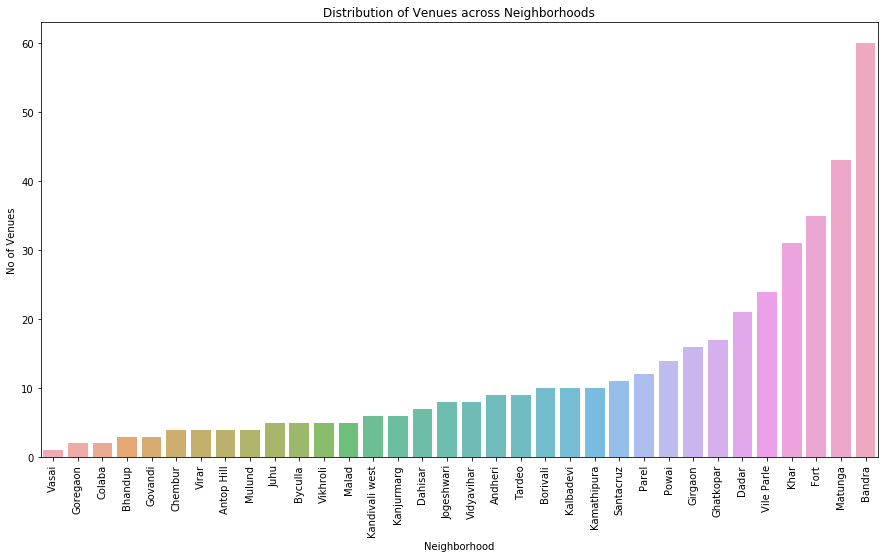

In [8]:
plt.figure(figsize=(15,8))
sns.barplot(mumbai_venues['Neighborhood'].value_counts(ascending=True).index,mumbai_venues['Neighborhood'].value_counts(ascending=True).values,alpha=0.8)  
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('No of Venues')
plt.title('Distribution of Venues across Neighborhoods')
plt.show()

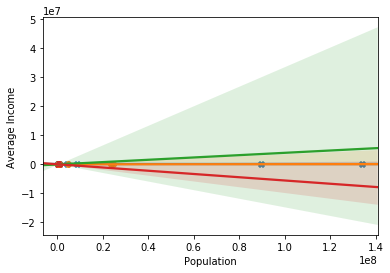

In [9]:
sns.regplot(x=master_data['Population'][master_data['Borough']=='Western Suburbs'],y=master_data['Average Income'][master_data['Borough']=='Western Suburbs'],marker='X')
sns.regplot(x=master_data['Population'][master_data['Borough']=='Eastern Suburbs'],y=master_data['Average Income'][master_data['Borough']=='Eastern Suburbs'],marker='o')
sns.regplot(x=master_data['Population'][master_data['Borough']=='Harbour Suburbs'],y=master_data['Average Income'][master_data['Borough']=='Harbour Suburbs'],marker='+')
sns.regplot(x=master_data['Population'][master_data['Borough']=='South Mumbai'],y=master_data['Average Income'][master_data['Borough']=='South Mumbai'],marker='*')

Let's check how many venues were returned for each neighborhood

In [10]:
mumbai_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Andheri,9,9,9,9,9,9
Antop Hill,4,4,4,4,4,4
Bandra,60,60,60,60,60,60
Bhandup,3,3,3,3,3,3
Borivali,10,10,10,10,10,10
Byculla,5,5,5,5,5,5
Chembur,4,4,4,4,4,4
Colaba,2,2,2,2,2,2
Dadar,21,21,21,21,21,21


<h3>Analyze each Neighborhood</h3>

In [11]:
# one hot encoding
mumbai_onehot = pd.get_dummies(mumbai_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mumbai_onehot['Neighborhood'] = mumbai_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [mumbai_onehot.columns[-1]] + list(mumbai_onehot.columns[:-1])
mumbai_onehot = mumbai_onehot[fixed_columns]

mumbai_onehot.head()

,Neighborhood,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,...,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Thai Restaurant,Theme Park,Train Station,Tree,Vegetarian / Vegan Restaurant,Wine Shop,Women's Store
0,Andheri,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Andheri,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Andheri,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Andheri,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Andheri,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [12]:
mumbai_grouped = mumbai_onehot.groupby('Neighborhood').mean().reset_index()
mumbai_grouped

,Neighborhood,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,...,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Thai Restaurant,Theme Park,Train Station,Tree,Vegetarian / Vegan Restaurant,Wine Shop,Women's Store
0,Andheri,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.111111,0.000000,0.000000
1,Antop Hill,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
2,Bandra,0.033333,0.0,0.0,0.000000,0.033333,0.000000,0.016667,0.033333,0.0,...,0.016667,0.000000,0.000000,0.033333,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
3,Bhandup,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
4,Borivali,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
5,Byculla,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
6,Chembur,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.250000
7,Colaba,0.000000,0.0,0.0,0.000000,0.500000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
8,Dadar,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.047619,0.000000,0.000000
9,Dahisar,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.00,0.000000,0.000000,0.000000


Let's write a function to sort the venues in descending order

In [13]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Let's create a dataframe with top 10 venues for each of them

In [14]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
mumbai_venues_sorted = pd.DataFrame(columns=columns)
mumbai_venues_sorted['Neighborhood'] = mumbai_grouped['Neighborhood']

for ind in np.arange(mumbai_grouped.shape[0]):
    mumbai_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mumbai_grouped.iloc[ind, :], num_top_venues)

mumbai_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,Food Truck,Dessert Shop
1,Antop Hill,Historic Site,Convenience Store,Pizza Place,Snack Place,Women's Store,Flower Shop,Department Store,Dessert Shop,Diner,Dog Run
2,Bandra,Indian Restaurant,Café,Chinese Restaurant,Gym / Fitness Center,Bakery,Seafood Restaurant,Bar,Event Space,Arcade,Thai Restaurant
3,Bhandup,Indian Restaurant,Bar,Restaurant,Women's Store,Food,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop
4,Borivali,Café,Gym,Dessert Shop,Italian Restaurant,Restaurant,Snack Place,Fast Food Restaurant,Women's Store,Flower Shop,Department Store


<h3>Setting up K-Means</h3>

The first step i to find the optimal value for K

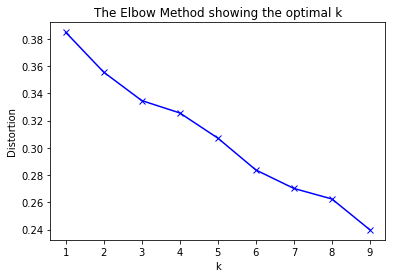

In [15]:
from scipy.spatial.distance import cdist
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(mumbai_grouped.drop('Neighborhood', 1))
    kmeanModel.fit(mumbai_grouped.drop('Neighborhood', 1))
    distortions.append(sum(np.min(cdist(mumbai_grouped.drop('Neighborhood', 1), kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / mumbai_grouped.drop('Neighborhood', 1).shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the above graph we can clearly determine that the optimal value for K is 3

In [16]:
kmeanModel = KMeans(n_clusters=3).fit(mumbai_grouped.drop('Neighborhood', 1))
mumbai_grouped['Clusters']=kmeanModel.labels_

In [17]:
mumbai_grouped.head()

,Neighborhood,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,...,Sporting Goods Shop,Steakhouse,Thai Restaurant,Theme Park,Train Station,Tree,Vegetarian / Vegan Restaurant,Wine Shop,Women's Store,Clusters
0,Andheri,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.111111,0.0,0.0,0
1,Antop Hill,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0
2,Bandra,0.033333,0.0,0.0,0.0,0.033333,0.0,0.016667,0.033333,0.0,...,0.0,0.0,0.033333,0.0,0.0,0.0,0.000000,0.0,0.0,0
3,Bhandup,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0
4,Borivali,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0


In [18]:
mumbai_grouped.groupby('Clusters').count()

,Neighborhood,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,...,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Thai Restaurant,Theme Park,Train Station,Tree,Vegetarian / Vegan Restaurant,Wine Shop,Women's Store
Clusters,,,,,,,,,,,,,,,,,,,,,
0,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [19]:
mumbai_grouped.groupby('Clusters')['Neighborhood'].count()

Clusters
0    32
1     1
2     1
Name: Neighborhood, dtype: int64

In [20]:
mumbai_venues_sorted = mumbai_venues_sorted.merge(mumbai_grouped,on='Neighborhood')
mumbai_venues_sorted.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Sporting Goods Shop,Steakhouse,Thai Restaurant,Theme Park,Train Station,Tree,Vegetarian / Vegan Restaurant,Wine Shop,Women's Store,Clusters
0,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,Food Truck,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.111111,0.0,0.0,0
1,Antop Hill,Historic Site,Convenience Store,Pizza Place,Snack Place,Women's Store,Flower Shop,Department Store,Dessert Shop,Diner,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0
2,Bandra,Indian Restaurant,Café,Chinese Restaurant,Gym / Fitness Center,Bakery,Seafood Restaurant,Bar,Event Space,Arcade,...,0.0,0.0,0.033333,0.0,0.0,0.0,0.000000,0.0,0.0,0
3,Bhandup,Indian Restaurant,Bar,Restaurant,Women's Store,Food,Department Store,Dessert Shop,Diner,Dog Run,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0
4,Borivali,Café,Gym,Dessert Shop,Italian Restaurant,Restaurant,Snack Place,Fast Food Restaurant,Women's Store,Flower Shop,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0


In [21]:
mumbai_venues_sorted = mumbai_venues_sorted.merge(mumbai_venues,on='Neighborhood')
mumbai_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Vegetarian / Vegan Restaurant,Wine Shop,Women's Store,Clusters,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,Food Truck,...,0.111111,0.0,0.0,0,19.1136,72.8697,Spirit Kitchen and Bar,19.111258,72.869820,Indian Restaurant
1,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,Food Truck,...,0.111111,0.0,0.0,0,19.1136,72.8697,"Peshawri Restaurant, Itc, Mumbai",19.109283,72.869891,Indian Restaurant
2,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,Food Truck,...,0.111111,0.0,0.0,0,19.1136,72.8697,Gajalee Coastal Food Annexure,19.117567,72.867485,Seafood Restaurant
3,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,Food Truck,...,0.111111,0.0,0.0,0,19.1136,72.8697,Domino's Pizza,19.112000,72.867000,Pizza Place
4,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,Food Truck,...,0.111111,0.0,0.0,0,19.1136,72.8697,Gopal Krishna Veg. Restaurant,19.111768,72.867730,Vegetarian / Vegan Restaurant


In [25]:
map_clusters = folium.Map(location=[mumbai_latitude, mumbai_longitude], zoom_start=11)
# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mumbai_venues_sorted['Neighborhood Latitude'], mumbai_venues_sorted['Neighborhood Longitude'], mumbai_venues_sorted['Neighborhood'], mumbai_venues_sorted['Clusters']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [26]:
map_clusters

<h3>Finding similar locations based on user's input</h3>

In [32]:
mumbai_income=master_data[['Borough','Neighborhood','Average Income']]
mumbai_income.head()

,Borough,Neighborhood,Average Income
0,Western Suburbs,Andheri,23456.0
1,Western Suburbs,Bandra,50000.0
2,Western Suburbs,Borivali,19000.0
3,Western Suburbs,Dahisar,23000.0
4,Western Suburbs,Goregaon,7600.0


In [33]:
mumbai_population=master_data[['Borough','Neighborhood','Population']]
mumbai_population.head()

,Borough,Neighborhood,Population
0,Western Suburbs,Andheri,810002.0
1,Western Suburbs,Bandra,337391.0
2,Western Suburbs,Borivali,513077.0
3,Western Suburbs,Dahisar,363827.0
4,Western Suburbs,Goregaon,437849.0


In [34]:
mumbai_population['Normalized_population'] = mumbai_population['Population']/mumbai_population['Population'].max(axis=0)
mumbai_population.head()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Borough,Neighborhood,Population,Normalized_population
0,Western Suburbs,Andheri,810002.0,0.006034
1,Western Suburbs,Bandra,337391.0,0.002513
2,Western Suburbs,Borivali,513077.0,0.003822
3,Western Suburbs,Dahisar,363827.0,0.002710
4,Western Suburbs,Goregaon,437849.0,0.003262


In [35]:
mumbai_income['Normalized_income'] = mumbai_income['Average Income']/mumbai_income['Average Income'].max(axis=0)
mumbai_income.head()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Borough,Neighborhood,Average Income,Normalized_income
0,Western Suburbs,Andheri,23456.0,0.234851
1,Western Suburbs,Bandra,50000.0,0.500621
2,Western Suburbs,Borivali,19000.0,0.190236
3,Western Suburbs,Dahisar,23000.0,0.230286
4,Western Suburbs,Goregaon,7600.0,0.076094


In [36]:
mumbai_grouped.head(2)

,Neighborhood,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,...,Sporting Goods Shop,Steakhouse,Thai Restaurant,Theme Park,Train Station,Tree,Vegetarian / Vegan Restaurant,Wine Shop,Women's Store,Clusters
0,Andheri,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0
1,Antop Hill,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0


<h4>Recommending Veg Restaurants</h4>

In [38]:
mumbai_veg = mumbai_onehot.groupby(['Neighborhood']).sum().reset_index()
mumbai_veg.head()

,Neighborhood,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,...,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Thai Restaurant,Theme Park,Train Station,Tree,Vegetarian / Vegan Restaurant,Wine Shop,Women's Store
0,Andheri,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Antop Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bandra,2,0,0,0,2,0,1,2,0,...,1,0,0,2,0,0,0,0,0,0
3,Bhandup,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Borivali,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
mumbai_veg['Vegetarian / Vegan Restaurant']

0     1
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     0
10    0
11    2
12    1
13    0
14    0
15    0
16    1
17    0
18    0
19    0
20    0
21    0
22    0
23    1
24    0
25    0
26    0
27    0
28    1
29    0
30    0
31    0
32    1
33    0
Name: Vegetarian / Vegan Restaurant, dtype: uint8

In [42]:
mumbai_veg = mumbai_veg[['Neighborhood','Vegetarian / Vegan Restaurant']]

In [44]:
mumbai_veg.rename(columns={'Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)
mumbai_veg.head()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Neighborhood,NumberOfVegRestaurants
0,Andheri,1
1,Antop Hill,0
2,Bandra,0
3,Bhandup,0
4,Borivali,0


In [45]:
mumbai_veg['NumberOfNonVeganrestaurants'] = 1-(mumbai_veg['NumberOfVegRestaurants']/mumbai_veg['NumberOfVegRestaurants'].max(axis=0))

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [46]:
mumbai_veg.head()

,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Andheri,1,0.5
1,Antop Hill,0,1.0
2,Bandra,0,1.0
3,Bhandup,0,1.0
4,Borivali,0,1.0


<h3>Building a target neighborhood by providing a sample restaurant : say 'Andheri'</h3>

In [48]:
target_cluster_dataframe = mumbai_venues_sorted.loc[mumbai_venues_sorted['Neighborhood']=='Andheri']
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Vegetarian / Vegan Restaurant,Wine Shop,Women's Store,Clusters,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,...,0.111111,0.0,0.0,0,19.1136,72.8697,Spirit Kitchen and Bar,19.111258,72.869820,Indian Restaurant
1,1,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,...,0.111111,0.0,0.0,0,19.1136,72.8697,"Peshawri Restaurant, Itc, Mumbai",19.109283,72.869891,Indian Restaurant
2,2,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,...,0.111111,0.0,0.0,0,19.1136,72.8697,Gajalee Coastal Food Annexure,19.117567,72.867485,Seafood Restaurant
3,3,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,...,0.111111,0.0,0.0,0,19.1136,72.8697,Domino's Pizza,19.112000,72.867000,Pizza Place
4,4,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,...,0.111111,0.0,0.0,0,19.1136,72.8697,Gopal Krishna Veg. Restaurant,19.111768,72.867730,Vegetarian / Vegan Restaurant
5,5,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,...,0.111111,0.0,0.0,0,19.1136,72.8697,Apna Dhaba,19.111247,72.870980,Hotel Bar
6,6,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,...,0.111111,0.0,0.0,0,19.1136,72.8697,VITS Hotel ★★★★☆ Mumbai,19.111632,72.871314,Hotel
7,7,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,...,0.111111,0.0,0.0,0,19.1136,72.8697,Kohinoor Continental,19.112325,72.867943,Hotel
8,8,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,...,0.111111,0.0,0.0,0,19.1136,72.8697,Bon Bon Supermarket JB Nagar,19.110905,72.866818,Department Store


In [50]:
target_cluster = target_cluster_dataframe.iloc[0].at['Clusters']
target_cluster

0

In [51]:
possible_neighborhoods = mumbai_venues_sorted[mumbai_venues_sorted['Clusters']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Vegetarian / Vegan Restaurant,Wine Shop,Women's Store,Clusters,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,Food Truck,...,0.111111,0.0,0.0,0,19.1136,72.8697,Spirit Kitchen and Bar,19.111258,72.869820,Indian Restaurant
1,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,Food Truck,...,0.111111,0.0,0.0,0,19.1136,72.8697,"Peshawri Restaurant, Itc, Mumbai",19.109283,72.869891,Indian Restaurant
2,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,Food Truck,...,0.111111,0.0,0.0,0,19.1136,72.8697,Gajalee Coastal Food Annexure,19.117567,72.867485,Seafood Restaurant
3,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,Food Truck,...,0.111111,0.0,0.0,0,19.1136,72.8697,Domino's Pizza,19.112000,72.867000,Pizza Place
4,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,Food Truck,...,0.111111,0.0,0.0,0,19.1136,72.8697,Gopal Krishna Veg. Restaurant,19.111768,72.867730,Vegetarian / Vegan Restaurant


In [53]:
print("There are {} neighborhoods which has similar characteristics to Andheri.".format(possible_neighborhoods.shape[0]))

There are 411 neighborhoods which has similar characteristics to Andheri.


In [54]:
possible_neighborhoods.reset_index().head()


,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Vegetarian / Vegan Restaurant,Wine Shop,Women's Store,Clusters,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,...,0.111111,0.0,0.0,0,19.1136,72.8697,Spirit Kitchen and Bar,19.111258,72.869820,Indian Restaurant
1,1,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,...,0.111111,0.0,0.0,0,19.1136,72.8697,"Peshawri Restaurant, Itc, Mumbai",19.109283,72.869891,Indian Restaurant
2,2,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,...,0.111111,0.0,0.0,0,19.1136,72.8697,Gajalee Coastal Food Annexure,19.117567,72.867485,Seafood Restaurant
3,3,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,...,0.111111,0.0,0.0,0,19.1136,72.8697,Domino's Pizza,19.112000,72.867000,Pizza Place
4,4,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,...,0.111111,0.0,0.0,0,19.1136,72.8697,Gopal Krishna Veg. Restaurant,19.111768,72.867730,Vegetarian / Vegan Restaurant


<h3>Now we need to create ranking by combining population and income factors as well</h3>

In [57]:
possible_neighborhoods = possible_neighborhoods.merge(mumbai_population[['Neighborhood','Population','Normalized_population']],on='Neighborhood')
possible_neighborhoods = possible_neighborhoods.merge(mumbai_income[['Neighborhood','Average Income','Normalized_income']],on='Neighborhood')
possible_neighborhoods = possible_neighborhoods.merge(mumbai_veg[['Neighborhood','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhood')

In [58]:
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Longitude,Venue Category,Population_x,Normalized_population_x,Population_y,Normalized_population_y,Average Income,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,Food Truck,...,72.869820,Indian Restaurant,810002.0,0.006034,810002.0,0.006034,23456.0,0.234851,1,0.5
1,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,Food Truck,...,72.869891,Indian Restaurant,810002.0,0.006034,810002.0,0.006034,23456.0,0.234851,1,0.5
2,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,Food Truck,...,72.867485,Seafood Restaurant,810002.0,0.006034,810002.0,0.006034,23456.0,0.234851,1,0.5
3,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,Food Truck,...,72.867000,Pizza Place,810002.0,0.006034,810002.0,0.006034,23456.0,0.234851,1,0.5
4,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,Department Store,Pizza Place,Hotel Bar,Vegetarian / Vegan Restaurant,Asian Restaurant,Food Truck,...,72.867730,Vegetarian / Vegan Restaurant,810002.0,0.006034,810002.0,0.006034,23456.0,0.234851,1,0.5


In [60]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population_x'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)

In [61]:
recommended_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category,Population_x,Normalized_population_x,Population_y,Normalized_population_y,Average Income,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants,Ranking
0,Vile Parle,Hotel,Indian Restaurant,Sandwich Place,Café,Food Truck,Nightclub,Lounge,Pizza Place,Playground,...,Café,134245345.0,1.0,134245345.0,1.0,34567.0,0.346099,1,0.5,0.671135
1,Vile Parle,Hotel,Indian Restaurant,Sandwich Place,Café,Food Truck,Nightclub,Lounge,Pizza Place,Playground,...,Restaurant,134245345.0,1.0,134245345.0,1.0,34567.0,0.346099,1,0.5,0.671135
2,Vile Parle,Hotel,Indian Restaurant,Sandwich Place,Café,Food Truck,Nightclub,Lounge,Pizza Place,Playground,...,Lounge,134245345.0,1.0,134245345.0,1.0,34567.0,0.346099,1,0.5,0.671135
3,Vile Parle,Hotel,Indian Restaurant,Sandwich Place,Café,Food Truck,Nightclub,Lounge,Pizza Place,Playground,...,Hotel,134245345.0,1.0,134245345.0,1.0,34567.0,0.346099,1,0.5,0.671135
4,Vile Parle,Hotel,Indian Restaurant,Sandwich Place,Café,Food Truck,Nightclub,Lounge,Pizza Place,Playground,...,Concert Hall,134245345.0,1.0,134245345.0,1.0,34567.0,0.346099,1,0.5,0.671135


In [62]:
top3 = recommended_neighborhoods.groupby(['Neighborhood','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [63]:
top3_df = pd.DataFrame(top3).reset_index()

In [64]:
top3_df.head(3)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Andheri,Hotel,Indian Restaurant,Seafood Restaurant,[0.13521479726]
1,Antop Hill,Historic Site,Convenience Store,Pizza Place,[0.450004596063]
2,Bandra,Indian Restaurant,Café,Chinese Restaurant,[0.276473890267]


Here, according the data, we see that 'Andheri,Antop Hill and Bandra' are top 3 neighborhoods to find similar food to Andheri's restaurant's veg food !
Here our model will recommend these neighborhoods and top 3 common venues to visit.¶


<h2>Thanks a lot for your review</h2>